In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import seaborn as sns
import math
import gc
import ipaddress
from urllib.parse import urlparse
from tldextract import extract
from sklearn.metrics import confusion_matrix

import sys
from pathlib import Path
d = Path().resolve().parent.parent
sys.path.insert(0, str(d))
import util.utils as utils
import util.plot_utils as plot_utils

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb

np.set_printoptions(threshold=np.nan)



plt.rcParams["figure.figsize"] = (12,4)

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score


InteractiveShell.ast_node_interactivity = "all"
np.set_printoptions(precision=2)

In [2]:
project_name="cross-sell"
def get_file_location(filename):
    return "../data/%s/%s" % (project_name,filename)

In [3]:
all_features = ['GL_TAG',
 'DC_SPEND_MON_04_TRL',
 'CREDIT_ACT',
 'CC_SPEND_MON_03_HTL',
 'SAL_MON_03',
 'CC_SPEND_MON_01_TRL',
 'CV_CLOSED',
 'TWL_TAG',
 'CC_SPEND_MON_05',
 'CC_SPEND_MON_01_HBY',
 'DC_SPEND_MON_04_MED',
 'NB_MON_02_CNT',
 'BL_CLOSED',
 'DC_SPEND_MON_05_ENT',
 'CC_SPEND_MON_03',
 'DC_ACTIVE_MON_03',
 'AGRI_TAG',
 'MATURITY_GL_month',
 'TL_SCRUB_LIVE',
 'LAS_CLOSED',
 'CAR_MON_02',
 'CC_SPEND_MON_01_HMD',
 'D_AMT_L3_MON_01',
 'SAL_MON_02',
 'CAR_MON_01',
 'C_COUNT_L3_MON_06',
 'TOP_800_CORP',
 'DC_SPEND_MON_01_HBY',
 'DC_SPEND_MON_05',
 'CC_SPEND_MON_04',
 'DC_TXN_MON_04',
 'STMT_MON_02',
 'AMB_MON_01',
 'DC_SPEND_MON_02',
 'CC_SPEND_MON_03_ENT',
 'DC_SPEND_MON_05_CARE',
 'D_COUNT_L3_MON_03',
 'CHANNEL_CLICK_DISP',
 'FD_MON_04',
 'TWL_MON_01',
 'GL_CLOSED',
 'CC_SPEND_MON_04_HMD',
 'CLOSED_DATE_month',
 'D_COUNT_L3_MON_02',
 'CARD_ENTMNT_MON_01',
 'EOP_BAL_MON_01',
 'DC_SPEND_MON_05_HMD',
 'CC_SPEND_MON_04_ATM',
 'OTHER_LOANS_TAG',
 'CC_SPEND_MON_02_ATM',
 'N_CASA_MAX_BALANCE_MTD',
 'DC_SPEND_MON_03_ENT',
 'CARD_PRSNL_CARE_MON_01',
 'GENDER',
 'DC_SPEND_MON_04_HMD',
 'NEFT_DC_AMOUNT',
 'TWL_MON_03',
 'CC_SPEND_MON_03_HBY',
 'CVL_TAG',
 'PL2CC_ACTIVE_MON_01',
 'PM_FD_MON_01',
 'JOBS_MON_01',
 'C_COUNT_L3_MON_05',
 'CC_SPEND_MON_01_HTL',
 'D_AMT_L3_MON_04',
 'PL2CC_ELIGIBLE',
 'RD_MON_04',
 'CC_ACTIVE',
 'CC_SPEND_MON_02_MED',
 'DC_SPEND_MON_03_MED',
 'CC_SPEND_MON_01_JER',
 'D_AMT_L3_MON_06',
 'DC_SPEND_MON_01',
 'MAX_C_AMT_L3_MON_06',
 'DC_ACTIVE_MON_01',
 'TPT_DC_AMOUNT_MON_01',
 'CC_SPEND_MON_04_RST',
 'TL_SCRUB_CLOSED',
 'CARD_AUTOMOBILE_MON_01',
 'DC_SPEND_MON_03_CARE',
 'AMB_MON_02',
 'DC_SPEND_MON_04_HTL',
 'C_COUNT_L3_MON_04',
 'DC_SPEND_MON_01_MED',
 'CC_SPEND_MON_02_TRL',
 'DC_SPEND_MON_01_JER',
 'CC_TXN_MON_02',
 'DC_SPEND_MON_05_JER',
 'MAX_C_AMT_L3_MON_03',
 'CC_SPEND_MON_02_HTL',
 'DC_SPEND_MON_02_JER',
 'DC_SPEND_MON_02_HTL',
 'CC_ACTIVE_MON_02',
 'C_AMT_L3_MON_03',
 'DC_SPEND_MON_04',
 'DC_SPEND_MON_03_RST',
 'DC_SPEND_MON_04_ATM',
 'MER_EMI_ACTIVE_MON_01',
 'DC_SPEND_MON_01_TRL',
 'CC_SPEND_MON_03_TRL',
 'CDL_MON_02',
 'LAP_TAG',
 'LAS_TAG',
 'CC_HOLD_MON_02',
 'AL_CNC_TAG',
 'CC_SPEND_MON_02_JER',
 'D_COUNT_L3_MON_06',
 'DC_SPEND_MON_05_HTL',
 'HL_EMI',
 'NEFT_DC_TXN',
 'CLOSED_DATE_week',
 'MATURITY_LAS_week',
 'MAX_C_AMT_L3_MON_02',
 'EEG_CLOSED',
 'CC_SPEND_MON_06',
 'PL_MON_03',
 'CC_TXN_MON_03',
 'MATURITY_LAP_year',
 'LI_MON_01',
 'CC_SPEND_MON_02_HBY',
 'CE_TAG',
 'TWL_SCRUB_LIVE',
 'CC_SPEND_MON_02',
 'DC_TXN_MON_05',
 'PM_FD_MON_04',
 'MER_EMI_CLOSED_MON_01',
 'IMPS_CC_AMOUNT_MON_01',
 'EEG_TAG',
 'COC_ELIGIBLE',
 'GL_MON_02',
 'PL_TAG',
 'PA_PQ_TAG',
 'TWL_CLOSED',
 'DC_SPEND_MON_05_MED',
 'DC_SPEND_MON_02_ENT',
 'LAA_MON_01',
 'CC_SPEND_MON_03_HMD',
 'GL_SCRUB_LIVE',
 'SAL_MON_01',
 'DC_SPEND_MON_02_MED',
 'DC_SPEND_MON_03_HTL',
 'CC_ACTIVE_MON_03',
 'STMT_CON_DAE_ACTIVE_MON_01',
 'D_COUNT_L3_MON_01',
 'CARD_HOTEL_MON_01',
 'CC_SPEND_MON_01',
 'CC_SPEND_MON_02_RST',
 'LFP_MON_01',
 'C_COUNT_L3_MON_01',
 'N_CASA_MIN_BALANCE_MTD',
 'D_AMT_L3_MON_05',
 'CEL_SCRUB_LIVE',
 'DC_TXN_MON_02',
 'COC_ACTIVE_MON_01',
 'DC_SPEND_MON_01_HMD',
 'AGL_TAG',
 'CC_HOLD',
 'EL_TAG',
 'CC_SPEND_MON_01_CARE',
 'CC_HOLD_MON_03',
 'CLOSED_DATE_year',
 'CC_TXN_MON_06',
 'DC_ACTIVE_MON_02',
 'GL_MON_01',
 'DC_SPEND_MON_04_CARE',
 'TPT_CC_TXN_MON_01',
 'CRED_NEED_SCORE',
 'MATURITY_LAS_year',
 'CARD_HOBBY_MON_01',
 'DC_SPEND_MON_03_TRL',
 'DC_SPEND_MON_04_JER',
 'AL_TAG',
 'CC_SPEND_MON_04_MED',
 'LEGAL_ENTITY',
 'INMON_01KET_MON_01',
 'STMT_MON_01',
 'CC_SPEND_MON_02_ENT',
 'DC_TXN_MON_03',
 'BTE_ACTIVE_MON_01',
 'CARD_HOME_DECOR_MON_01',
 'NEFT_CC_AMOUNT',
 'DC_SPEND_MON_05_HBY',
 'MAX_C_AMT_L3_MON_04',
 'CARD_RESTAURANT_MON_01',
 'DC_SPEND_MON_04_GRC',
 'DC_SPEND_MON_01_ENT',
 'CARD_MEDICAL_MON_01',
 'DC_SPEND_MON_05_RST',
 'C_AMT_L3_MON_04',
 'PL2CC_CLOSED_MON_01',
 'DC_SPEND_MON_03_HMD',
 'CC_HOLD_MON_01',
 'STMT_MON_03',
 'LAP_SCRUB_LIVE',
 'MATURITY_LAP_month',
 'TOP_100_CORP',
 'DC_SPEND_MON_04_HBY',
 'CC_SPEND_MON_03_JER',
 'CC_TXN_MON_04',
 'DC_HOLD',
 'GL_MON_03',
 'LIFESTYLE_MON_01',
 'CDL_MON_03',
 'DC_SPEND_MON_01_ATM',
 'D_AMT_L3_MON_03',
 'STMT_CON_DAE_CLOSED_MON_01',
 'DC_SPEND_MON_03',
 'IMPS_CC_TXN_MON_01',
 'FD_MON_01',
 'DC_SPEND_MON_05_TRL',
 'AL_SCRUB_CLOSED',
 'MATURITY_LAP_week',
 'CC_SPEND_MON_01_ENT',
 'CC_SPEND_MON_03_RST',
 'CC_SPEND_MON_02_CARE',
 'TWL_MON_02',
 'CR_LIMIT',
 'AMB_MON_04',
 'BTE_CLOSED_MON_01',
 'TPT_DC_CATEGORY_MON_01',
 'CDL_MON_01',
 'DC_TXN_MON_01',
 'AGE',
 'LAP_CLOSED',
 'CC_SPEND_MON_03_MED',
 'EDU_TAG',
 'MF_MON_01',
 'ACT_TYPE',
 'TPT_CC_AMOUNT_MON_01',
 'LAS_SCRUB_LIVE',
 'CDMAT_MON_01',
 'CC_SPEND_MON_04_HBY',
 'HL_TAG',
 'IMPS_CC_CATEGORY_MON_01',
 'CC_TXN_MON_01',
 'COC_CLOSED_MON_01',
 'MAX_C_AMT_L3_MON_01',
 'CARD_TRAVEL_MON_01',
 'D_COUNT_L3_MON_04',
 'MATURITY_GL_week',
 'DC_SPEND_MON_03_ATM',
 'CDMAT_MON_04',
 'PL_MON_02',
 'NEFT_CC_CATEGORY',
 'DC_SPEND_MON_02_RST',
 'SCRUB_EMI',
 'TRN_CON_DAE_CLOSED_MON_01',
 'CC_SPEND_MON_03_CARE',
 'DC_SPEND_MON_03_JER',
 'CC_SPEND_MON_01_ATM',
 'ZIP_CODE_FINAL',
 'DEBIT_ACT',
 'TWL_SCRUB_CLOSED',
 'CC_SPEND_MON_02_HMD',
 'CEL_TAG',
 'CC_ACTIVE_MON_01',
 'DC_ACTIVE',
 'DESIGNATION_FINAL',
 'EOP_MON_03',
 'CC_SPEND_MON_03_ATM',
 'EOP_MON_02',
 'C_AMT_L3_MON_01',
 'CARD_JEWELLERY_MON_01',
 'PL_SCRUB_LIVE',
 'C_AMT_L3_MON_06',
 'TL_TAG',
 'D_AMT_L3_MON_02',
 'PREV_3MTHS_INQ',
 'TPT_DC_TXN_MON_01',
 'CC_SPEND_MON_04_TRL',
 'C_AMT_L3_MON_05',
 'DC_SPEND_MON_04_ENT',
 'LFP_MON_03',
 'DC_SPEND_MON_02_HBY',
 'TPT_CC_CATEGORY_MON_01',
 'NEFT_DC_CATEGORY',
 'MAX_C_AMT_L3_MON_05',
 'LAA_MON_03',
 'MF_MON_04',
 'TRN_CON_DAE_ACTIVE_MON_01',
 'PL_CLOSED',
 'DC_SPEND_MON_02_HMD',
 'BL_SCRUB_CLOSED',
 'MATURITY_GL_year',
 'DC_SPEND_MON_02_TRL',
 'DC_SPEND_MON_05_ATM',
 'C_COUNT_L3_MON_03',
 'CC_SPEND_MON_04_ENT',
 'RD_MON_01',
 'BL_SCRUB_LIVE',
 'DC_SPEND_MON_03_HBY',
 'CC_SPEND_MON_01_MED',
 'LFP_MON_02',
 'AMB_MON_03',
 'NB_MON_03_CNT',
 'CC_SPEND_MON_04_CARE',
 'CC_SPEND_MON_04_JER',
 'DC_SPEND_MON_01_CARE',
 'DC_SPEND_MON_04_RST',
 'AL_CLOSED',
 'DC_TXN_MON_06',
 'LAA_MON_02',
 'DC_SPEND_MON_01_HTL',
 'DC_SPEND_MON_01_RST',
 'PM_FD_MON_02',
 'LAS_SCRUB_CLOSED',
 'AL_SCRUB_LIVE',
 'DC_SPEND_MON_06',
 'DC_SPEND_MON_02_ATM',
 'NB_MON_01_CNT',
 'TRAVEL_MON_01',
 'BL_TAG',
 'GL_SCRUB_CLOSED',
 'PL_MON_01',
 'CEL_SCRUB_CLOSED',
 'LAP_SCRUB_CLOSED',
 'TOP14_CITY',
 'DC_SPEND_MON_02_CARE',
 'C_AMT_L3_MON_02',
 'CC_SPEND_MON_04_HTL',
 'MATURITY_LAS_month',
 'NEFT_CC_TXN',
 'CV_TAG',
 'PL_SCRUB_CLOSED',
 'GI_MON_01',
 'C_COUNT_L3_MON_02',
 'CAR_MON_03',
 'CC_TXN_MON_05',
 'LI_MON_04',
 'GI_MON_04',
 'D_COUNT_L3_MON_05',
 'TOP_CORP_TAG',
 'FINANCE_MON_01',
 'LAST_3MTHS_INQ',
 'TOP9_CITY',
 'CC_SPEND_MON_01_RST']




output_column = "RESPONDERS"

In [5]:
df = pd.read_hdf(get_file_location("train.h5"),"table")
df_test = pd.read_hdf(get_file_location("test.h5"),"table")

In [41]:
single_valued_features = []
for column in all_features:
    train_uniq = df[column].unique()
    test_uniq = df_test[column].unique()
    if(len(train_uniq)==1 or len(test_uniq)==1):
        print(column)
        single_valued_features.append(column)
        print(train_uniq)
        print(test_uniq)
        print("============xxx===========\n")
        
df.drop(single_valued_features, axis = 1, inplace = True)
df_test.drop(single_valued_features, axis = 1, inplace = True)
all_features = list(set(all_features)-set(single_valued_features))

EEG_CLOSED
[ nan]
[ nan]
============xxx===========

PM_FD_MON_04
[ nan]
[ nan]
============xxx===========

MER_EMI_CLOSED_MON_01
[ nan]
[ nan]
============xxx===========

EEG_TAG
[ nan]
[ nan]
============xxx===========

STMT_CON_DAE_ACTIVE_MON_01
[ nan]
[ nan]
============xxx===========

STMT_CON_DAE_CLOSED_MON_01
[ nan]
[ nan]
============xxx===========

PM_FD_MON_02
[ nan]
[ nan]
============xxx===========



NB_MON_01_CNT
[-1.  1.]
[-1.  1.]
============xxx===========

LFP_MON_01
[-1.  1.]
[-1.  1.]
============xxx===========

PL_SCRUB_LIVE
[-1.  1.]
[-1.  1.]
============xxx===========

TL_SCRUB_CLOSED
[-1.  1.]
[-1.  1.]
============xxx===========

CAR_MON_03
[-1.  1.]
[-1.  1.]
============xxx===========

CDL_MON_02
[-1.  1.]
[-1.  1.]
============xxx===========

AL_SCRUB_CLOSED
[-1.  1.]
[-1.  1.]
============xxx===========

LAP_SCRUB_CLOSED
[-1.  1.]
[-1.  1.]
============xxx===========

LAA_MON_02
[-1.  1.]
[-1.  1.]
============xxx===========

GL_SCRUB_CLOSED
[-1.  1.]
[-1.  1.]
============xxx===========

TWL_MON_03
[-1.  1.]
[-1.  1.]
============xxx===========

TL_SCRUB_LIVE
[-1.  1.]
[-1.  1.]
============xxx===========

GL_MON_03
[-1.  1.]
[-1.  1.]
============xxx===========

LFP_MON_02
[-1.  1.]
[-1.  1.]
============xxx===========

GL_SCRUB_LIVE
[-1.  1.]
[-1.  1.]
============xxx===========

LAS_SCRUB_CLOSED
[-1.  1.]
[-1.  1.]
============xxx===========

GL_MON_02
[-1.  1.

In [87]:
test_dt = df_test[all_features].dtypes
float_features = []
for k,v in df[all_features].dtypes.items():
    if(v in ['float64'] and test_dt[k] in ['float64']):
        float_features.append(k)



int_features = []
for k,v in df[all_features].dtypes.items():
    if(v in ['int64'] and test_dt[k] in ['int64']):
        int_features.append(k)
        


obj_features = []
for k,v in df[all_features].dtypes.items():
    if(v in ['object','str'] or test_dt[k] in ['object','str']):
        obj_features.append(k)
        
len(float_features)
len(int_features)
len(obj_features)

features = float_features + int_features

157

160

12

In [49]:
converted_to_int = []
for column in float_features:
    train_uniq = df[column].unique()
    test_uniq = df_test[column].unique()
    if(len(train_uniq)<10 and len(test_uniq)<10):
        df[column].fillna(-1,inplace=True)
        df_test[column].fillna(-1,inplace=True)
        df[column] = df[column].astype(int)
        df_test[column] = df_test[column].astype(int)
        converted_to_int.append(column)
        print(column)
        print(train_uniq)
        print(test_uniq)
        print("============xxx===========\n")
        
float_features = list(set(float_features) - set(converted_to_int))
int_features = list(set(int_features + converted_to_int))

NB_MON_01_CNT
[-1.  1.]
[-1.  1.]
============xxx===========

LFP_MON_01
[-1.  1.]
[-1.  1.]
============xxx===========

PL_SCRUB_LIVE
[-1.  1.]
[-1.  1.]
============xxx===========

TL_SCRUB_CLOSED
[-1.  1.]
[-1.  1.]
============xxx===========

CAR_MON_03
[-1.  1.]
[-1.  1.]
============xxx===========

CDL_MON_02
[-1.  1.]
[-1.  1.]
============xxx===========

AL_SCRUB_CLOSED
[-1.  1.]
[-1.  1.]
============xxx===========

LAP_SCRUB_CLOSED
[-1.  1.]
[-1.  1.]
============xxx===========

LAA_MON_02
[-1.  1.]
[-1.  1.]
============xxx===========

GL_SCRUB_CLOSED
[-1.  1.]
[-1.  1.]
============xxx===========

TWL_MON_03
[-1.  1.]
[-1.  1.]
============xxx===========

TL_SCRUB_LIVE
[-1.  1.]
[-1.  1.]
============xxx===========

GL_MON_03
[-1.  1.]
[-1.  1.]
============xxx===========

LFP_MON_02
[-1.  1.]
[-1.  1.]
============xxx===========

GL_SCRUB_LIVE
[-1.  1.]
[-1.  1.]
============xxx===========

LAS_SCRUB_CLOSED
[-1.  1.]
[-1.  1.]
============xxx===========

GL_MON_02
[-1.  1.

In [86]:
converted_to_int = []

for column in float_features:
    cols = ["NEFT_CC_TXN","NEFT_DC_TXN","IMPS_CC_TXN",
            "ZIP_CODE_FINAL","TPT_CC_TXN_MON",
            "DC_TXN_MON","CC_TXN_MON",
            "D_COUNT_L3_MON","C_COUNT_L3_MON","TPT_DC_TXN"]
    cols2 = ["_month","_week","_year"]
    if any(map(column.startswith, cols)) or any(map(column.endswith, cols2)):
        converted_to_int.append(column)
        df[column].fillna(-1,inplace=True)
        df_test[column].fillna(-1,inplace=True)
        df[column] = df[column].astype(int)
        df_test[column] = df_test[column].astype(int)

float_features = list(set(float_features) - set(converted_to_int))
int_features = list(set(int_features + converted_to_int))

In [85]:

for column in float_features:
    train_uniq = df[column].unique()
    test_uniq = df_test[column].unique()
    print("%s : %d" % (column,len(train_uniq)))

DC_SPEND_MON_04_GRC : 6471
CC_SPEND_MON_03_JER : 1365
HL_EMI : 1578
CC_SPEND_MON_03_HBY : 1656
TPT_DC_AMOUNT_MON_01 : 4904
CC_SPEND_MON_03_TRL : 3756
N_CASA_MAX_BALANCE_MTD : 205407
CDMAT_MON_04 : 4378
EOP_MON_02 : 182534
DC_SPEND_MON_01 : 17528
CC_SPEND_MON_02_ENT : 2872
DC_SPEND_MON_01_JER : 1361
DC_SPEND_MON_05 : 36838
DC_SPEND_MON_03_CARE : 1512
DC_SPEND_MON_05_ENT : 3604
MAX_C_AMT_L3_MON_04 : 52524
CC_SPEND_MON_01_HBY : 1469
CDMAT_MON_01 : 4472
AMB_MON_02 : 201297
CC_SPEND_MON_01 : 14497
D_AMT_L3_MON_02 : 119507
STMT_MON_02 : 54393
N_CASA_MIN_BALANCE_MTD : 136284
CC_SPEND_MON_02_HMD : 507
FD_MON_01 : 4232
DC_SPEND_MON_01_HMD : 594
CC_SPEND_MON_03 : 16092
CC_SPEND_MON_04_HMD : 630
CC_SPEND_MON_01_HTL : 2590
CC_SPEND_MON_01_MED : 3410
DC_SPEND_MON_03_TRL : 3444
CC_SPEND_MON_04_RST : 5903
D_AMT_L3_MON_04 : 121051
AMB_MON_01 : 203803
DC_SPEND_MON_03_RST : 8748
RD_MON_04 : 306
CC_SPEND_MON_04_TRL : 3874
DC_SPEND_MON_05_TRL : 3051
DC_SPEND_MON_05_ATM : 1555
DC_SPEND_MON_02_JER : 1584
FD

In [64]:
loan_columns = []
for column in all_features:
    if(column.endswith("TAG") or column.endswith("LIVE")):
        loan_columns.append(column)
        
loan_columns = list(set(loan_columns)-set(["EEG_TAG","BBG_TAG","TOP_CORP_TAG","CV_TAG","CE_TAG"]))


past_loan_columns = []
for column in all_features:
    if(column.endswith("CLOSED")):
        past_loan_columns.append(column)
        
past_loan_columns = list(set(past_loan_columns)-set(["EEG_CLOSED","BBG_CLOSED","CV_CLOSED"]))

In [65]:
def total_loans():
    df1=df[loan_columns].replace(-1,np.nan)
    df2=df_test[loan_columns].replace(-1,np.nan)
    df["total_loans"] = df1[loan_columns].sum(axis=1)
    df_test["total_loans"] = df2[loan_columns].sum(axis=1)
    
def past_total_loans():
    df1=df[past_loan_columns].replace(-1,np.nan)
    df2=df_test[past_loan_columns].replace(-1,np.nan)
    df["past_total_loans"] = df1[past_loan_columns].sum(axis=1)
    df_test["past_total_loans"] = df2[past_loan_columns].sum(axis=1)
    
def closed_fd_before_maturity():
    fd_columns = ["PM_FD_MON_01","PM_FD_MON_02","PM_FD_MON_04"]
    
    df["closed_fd"] = df[fd_columns].sum(axis=1)
    df.loc[df["closed_fd"]>=1,"closed_fd"] = 1
    df_test["closed_fd"] = df_test[fd_columns].sum(axis=1)
    df_test.loc[df_test["closed_fd"]>=1,"closed_fd"] = 1
    
total_loans()
past_total_loans()
# closed_fd_before_maturity() not needed since columns were removed.

In [89]:
df[df["total_loans"]>1][loan_columns+["total_loans"]].head(20)
df[df["past_total_loans"]>1][past_loan_columns+["past_total_loans"]].head(20)



,TWL_TAG,AGRI_TAG,EL_TAG,LAS_SCRUB_LIVE,TL_SCRUB_LIVE,AL_CNC_TAG,PL_TAG,AL_SCRUB_LIVE,EDU_TAG,LAS_TAG,...,OTHER_LOANS_TAG,GL_SCRUB_LIVE,GL_TAG,TWL_SCRUB_LIVE,CEL_SCRUB_LIVE,CVL_TAG,AL_TAG,PA_PQ_TAG,BL_SCRUB_LIVE,total_loans
21,-1,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,STP,-1,2.0
29,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,NaN,-1,2.0
38,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,Green Channel,-1,3.0
60,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,NaN,-1,2.0
87,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,NaN,-1,2.0
97,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,STP,-1,2.0
98,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,NaN,-1,2.0
128,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,NaN,-1,2.0
208,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,Green Channel,-1,4.0
226,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,NaN,1,2.0


,GL_SCRUB_CLOSED,TL_SCRUB_CLOSED,BL_SCRUB_CLOSED,AL_SCRUB_CLOSED,BL_CLOSED,TWL_SCRUB_CLOSED,LAP_CLOSED,GL_CLOSED,PL_SCRUB_CLOSED,PL_CLOSED,TWL_CLOSED,LAP_SCRUB_CLOSED,LAS_CLOSED,AL_CLOSED,CEL_SCRUB_CLOSED,LAS_SCRUB_CLOSED,past_total_loans
6,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2.0
21,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,2.0
38,1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,2.0
41,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,2.0
97,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,2.0
142,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,2.0
175,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2.0
200,-1,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,2.0
216,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,3.0
240,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,3.0


In [90]:
features = list(set(features + ["total_loans","past_total_loans"]))

In [92]:
features
all_features
int_features
float_features
obj_features


['DC_TXN_MON_04',
 'DC_SPEND_MON_04_GRC',
 'BL_CLOSED',
 'CC_SPEND_MON_03_JER',
 'AGE',
 'HL_EMI',
 'DC_SPEND_MON_01_RST',
 'CC_SPEND_MON_03_HBY',
 'NB_MON_01_CNT',
 'TPT_DC_AMOUNT_MON_01',
 'CC_ACTIVE_MON_03',
 'CC_SPEND_MON_03_TRL',
 'LAP_SCRUB_LIVE',
 'TRAVEL_MON_01',
 'LFP_MON_01',
 'CC_SPEND_MON_02_JER',
 'TOP14_CITY',
 'N_CASA_MAX_BALANCE_MTD',
 'PL_MON_02',
 'BTE_ACTIVE_MON_01',
 'CDMAT_MON_04',
 'CC_SPEND_MON_01_RST',
 'CC_SPEND_MON_01_CARE',
 'PL_SCRUB_LIVE',
 'TPT_CC_TXN_MON_01',
 'CC_TXN_MON_02',
 'JOBS_MON_01',
 'TWL_SCRUB_LIVE',
 'CC_SPEND_MON_02_HBY',
 'EOP_MON_02',
 'DC_SPEND_MON_01',
 'CC_SPEND_MON_02_ENT',
 'STMT_MON_03',
 'CC_SPEND_MON_03_CARE',
 'CC_SPEND_MON_04_HTL',
 'CC_SPEND_MON_04_ATM',
 'CVL_TAG',
 'CC_TXN_MON_01',
 'C_COUNT_L3_MON_02',
 'LAA_MON_03',
 'CC_TXN_MON_03',
 'CC_SPEND_MON_02_HTL',
 'DC_SPEND_MON_02_RST',
 'LIFESTYLE_MON_01',
 'DC_SPEND_MON_01_JER',
 'DC_SPEND_MON_05',
 'DC_SPEND_MON_03_CARE',
 'MF_MON_04',
 'DC_SPEND_MON_05_ENT',
 'MAX_C_AMT_L3_MON_

['DC_SPEND_MON_04_GRC',
 'GENDER',
 'CC_SPEND_MON_03_JER',
 'AGE',
 'HL_EMI',
 'NB_MON_01_CNT',
 'CC_SPEND_MON_03_HBY',
 'TPT_DC_AMOUNT_MON_01',
 'CC_ACTIVE_MON_03',
 'CC_SPEND_MON_03_TRL',
 'TRAVEL_MON_01',
 'LFP_MON_01',
 'TOP14_CITY',
 'N_CASA_MAX_BALANCE_MTD',
 'BTE_ACTIVE_MON_01',
 'CDMAT_MON_04',
 'PL_SCRUB_LIVE',
 'EOP_MON_02',
 'DC_SPEND_MON_01',
 'CC_SPEND_MON_02_ENT',
 'CVL_TAG',
 'CC_TXN_MON_03',
 'ACT_TYPE',
 'DC_SPEND_MON_01_JER',
 'DC_SPEND_MON_05',
 'DC_SPEND_MON_03_CARE',
 'DC_SPEND_MON_05_ENT',
 'LAS_TAG',
 'MAX_C_AMT_L3_MON_04',
 'CC_SPEND_MON_01_HBY',
 'CDMAT_MON_01',
 'LAP_CLOSED',
 'AMB_MON_02',
 'BTE_CLOSED_MON_01',
 'CC_SPEND_MON_01',
 'D_AMT_L3_MON_02',
 'STMT_MON_02',
 'LEGAL_ENTITY',
 'N_CASA_MIN_BALANCE_MTD',
 'PREV_3MTHS_INQ',
 'CC_SPEND_MON_02_HMD',
 'D_COUNT_L3_MON_05',
 'CLOSED_DATE_week',
 'FD_MON_01',
 'DC_SPEND_MON_01_HMD',
 'IMPS_CC_CATEGORY_MON_01',
 'CC_SPEND_MON_03',
 'TL_SCRUB_CLOSED',
 'CC_SPEND_MON_04_HMD',
 'PL_TAG',
 'CAR_MON_03',
 'D_COUNT_L3

['AGE',
 'NB_MON_01_CNT',
 'CC_ACTIVE_MON_03',
 'TRAVEL_MON_01',
 'LFP_MON_01',
 'TOP14_CITY',
 'BTE_ACTIVE_MON_01',
 'PL_SCRUB_LIVE',
 'CVL_TAG',
 'CC_TXN_MON_03',
 'LAS_TAG',
 'LAP_CLOSED',
 'BTE_CLOSED_MON_01',
 'PREV_3MTHS_INQ',
 'D_COUNT_L3_MON_05',
 'CLOSED_DATE_week',
 'TL_SCRUB_CLOSED',
 'PL_TAG',
 'CAR_MON_03',
 'D_COUNT_L3_MON_02',
 'EDU_TAG',
 'DC_TXN_MON_01',
 'CC_TXN_MON_05',
 'MER_EMI_ACTIVE_MON_01',
 'CDL_MON_02',
 'DC_ACTIVE_MON_02',
 'DC_HOLD',
 'AL_SCRUB_CLOSED',
 'CV_CLOSED',
 'LAP_SCRUB_CLOSED',
 'PL2CC_ACTIVE_MON_01',
 'FINANCE_MON_01',
 'LAA_MON_02',
 'DC_TXN_MON_02',
 'NEFT_DC_TXN',
 'GL_SCRUB_CLOSED',
 'NEFT_CC_TXN',
 'COC_CLOSED_MON_01',
 'CARD_JEWELLERY_MON_01',
 'DC_ACTIVE_MON_03',
 'DC_TXN_MON_05',
 'CC_HOLD_MON_02',
 'IMPS_CC_TXN_MON_01',
 'PL_CLOSED',
 'DC_TXN_MON_06',
 'CARD_TRAVEL_MON_01',
 'AL_CLOSED',
 'OTHER_LOANS_TAG',
 'DC_TXN_MON_03',
 'TWL_MON_03',
 'MATURITY_LAS_week',
 'TL_SCRUB_LIVE',
 'D_COUNT_L3_MON_04',
 'GL_MON_03',
 'LFP_MON_02',
 'AGL_TAG

['DC_SPEND_MON_04_GRC',
 'CC_SPEND_MON_03_JER',
 'HL_EMI',
 'CC_SPEND_MON_03_HBY',
 'TPT_DC_AMOUNT_MON_01',
 'CC_SPEND_MON_03_TRL',
 'N_CASA_MAX_BALANCE_MTD',
 'CDMAT_MON_04',
 'EOP_MON_02',
 'DC_SPEND_MON_01',
 'CC_SPEND_MON_02_ENT',
 'DC_SPEND_MON_01_JER',
 'DC_SPEND_MON_05',
 'DC_SPEND_MON_03_CARE',
 'DC_SPEND_MON_05_ENT',
 'MAX_C_AMT_L3_MON_04',
 'CC_SPEND_MON_01_HBY',
 'CDMAT_MON_01',
 'AMB_MON_02',
 'CC_SPEND_MON_01',
 'D_AMT_L3_MON_02',
 'STMT_MON_02',
 'N_CASA_MIN_BALANCE_MTD',
 'CC_SPEND_MON_02_HMD',
 'FD_MON_01',
 'DC_SPEND_MON_01_HMD',
 'CC_SPEND_MON_03',
 'CC_SPEND_MON_04_HMD',
 'CC_SPEND_MON_01_HTL',
 'CC_SPEND_MON_01_MED',
 'DC_SPEND_MON_03_TRL',
 'CC_SPEND_MON_04_RST',
 'D_AMT_L3_MON_04',
 'AMB_MON_01',
 'DC_SPEND_MON_03_RST',
 'RD_MON_04',
 'CC_SPEND_MON_04_TRL',
 'DC_SPEND_MON_05_TRL',
 'DC_SPEND_MON_05_ATM',
 'DC_SPEND_MON_02_JER',
 'FD_MON_04',
 'CC_SPEND_MON_02_TRL',
 'DC_SPEND_MON_02_ATM',
 'DC_SPEND_MON_03_HMD',
 'DC_SPEND_MON_02_HMD',
 'DC_SPEND_MON_02_CARE',
 'R

['GENDER',
 'ACT_TYPE',
 'LEGAL_ENTITY',
 'IMPS_CC_CATEGORY_MON_01',
 'CHANNEL_CLICK_DISP',
 'TPT_CC_CATEGORY_MON_01',
 'TPT_DC_CATEGORY_MON_01',
 'NEFT_DC_CATEGORY',
 'PA_PQ_TAG',
 'DESIGNATION_FINAL',
 'NEFT_CC_CATEGORY',
 'TOP_CORP_TAG']

In [93]:
df.to_hdf(get_file_location("train-2.h5"),"table",mode='w')
df_test.to_hdf(get_file_location("test-2.h5"),"table",mode='w')

/Users/ahemf/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:1299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['ACT_TYPE', 'GENDER', 'LEGAL_ENTITY', 'CHANNEL_CLICK_DISP', 'DESIGNATION_FINAL', 'PA_PQ_TAG', 'NEFT_CC_CATEGORY', 'NEFT_DC_CATEGORY', 'TPT_DC_CATEGORY_MON_01', 'TPT_CC_CATEGORY_MON_01', 'IMPS_CC_CATEGORY_MON_01', 'TOP_CORP_TAG', 'RESPONDERS']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
/Users/ahemf/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:1299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['ACT_TYPE', 'GENDER', 'LEGAL_ENTITY', 'CHANNEL_CLICK_DISP', 'DESIGNATION_FINAL', 'PA_PQ_TAG', 'NEFT_CC_CATEGORY', 'NEFT_DC_CATEGORY', 'TPT_DC_CATEGORY_MON_01', 'TPT_CC_CATEGORY_MON_01'

In [94]:
gc.collect()
X = df[features].values
# y = np.log10(df_train[output_column].values + 1)
y = df[output_column].values

4347

In [101]:
xgc = XGBClassifier(max_depth=12, learning_rate=0.7,booster='dart',n_estimators=200,n_jobs=2,missing=np.nan)
xgc.fit(X, y.ravel())
gc.collect()

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.7, max_delta_step=0,
       max_depth=12, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

2179

In [102]:
def xgc_pred(X):
    return xgc.predict_proba(X)[:,1:2].flatten()

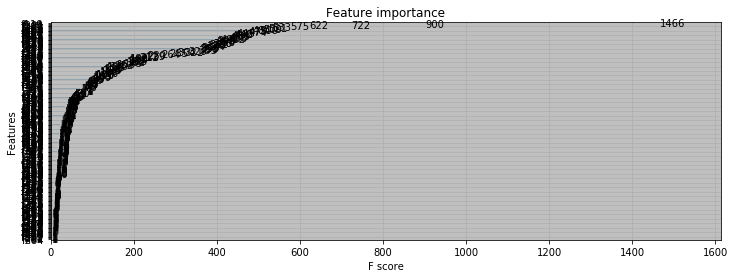

(319, 2)


,feature,importance
119,ZIP_CODE_FINAL,5.532493
201,SCRUB_EMI,3.396483
4,AGE,2.724734
269,D_AMT_L3_MON_06,2.347347
273,D_AMT_L3_MON_05,2.169975
207,D_AMT_L3_MON_01,2.011472
282,SAL_MON_01,1.966186
68,D_AMT_L3_MON_02,1.920900
109,D_AMT_L3_MON_04,1.886935
244,D_AMT_L3_MON_03,1.826553


,feature,importance
119,ZIP_CODE_FINAL,5.532493
201,SCRUB_EMI,3.396483
4,AGE,2.724734
269,D_AMT_L3_MON_06,2.347347
273,D_AMT_L3_MON_05,2.169975
207,D_AMT_L3_MON_01,2.011472
282,SAL_MON_01,1.966186
68,D_AMT_L3_MON_02,1.920900
109,D_AMT_L3_MON_04,1.886935
244,D_AMT_L3_MON_03,1.826553


In [103]:
def plot_importance(model,df,features):
    from xgboost import plot_importance
    plot_importance(model)
    plt.show()
    fi=model.feature_importances_

    fn=df[features].columns.values

    df_i=pd.DataFrame({"feature":fn,"importance":fi})
    df_i["importance"] = df_i["importance"]*100
    print(df_i.shape)
    return df_i.sort_values("importance",ascending=False)

imp=plot_importance(xgc,df,features)
imp.head(10)
imp

In [104]:
gc.collect()
def predict_and_store(model,filename):
    X_t = df_test[features].values
    y_t = model(X_t)
#     my_solution = pd.DataFrame(y_t, ids, columns = [output_column])
    my_solution = pd.DataFrame({"CUSTOMER_ID":df_test["CUSTOMER_ID"],"RESPONDERS":y_t})
#     my_solution[output_column] = my_solution[output_column].round(3)

    print(my_solution.shape)
#     my_solution.to_csv(filename, index_label = ["ID"])
    my_solution.to_csv(filename,index=False,columns=["CUSTOMER_ID","RESPONDERS"])
    
predict_and_store(xgc_pred,"results.csv")

111394

(200000, 2)


In [ ]:
def fillna(df,column):
    if(df[column].dtypes=='int64'):
        df[column].fillna(-1,inplace=True)
    if(df[column].dtypes=='float64'):
        df[column].fillna(-1.0,inplace=True)
    if(df[column].dtypes=='object'):
        df[column].fillna('-997.0',inplace=True)
        
for column in all_features:
    fillna(df,column)
    fillna(df_test,column)

In [ ]:
def label_encode_field(df,df_test,field):
    encoded_df = df[field].append(df_test[field])
    label_encoder = LabelEncoder()
    encoder = label_encoder.fit(encoded_df.values)
    encoded_t=encoder.transform(df_test[field].values)
    df_test[field] = encoded_t
    encoded_df=encoder.transform(df[field].values)
    df[field] = encoded_df
    return encoder

def store_encoder_as_file(le,column_name):
    ids =np.arange(0,len(list(le.classes_))).astype(int)
    my_encoding = pd.DataFrame(list(le.classes_), ids, columns = [column_name])
    print(my_encoding.shape)
    my_encoding.to_csv(get_file_location("%s-encoding.csv" % column_name), index_label = ["id"])

for field in obj_features:
    store_encoder_as_file(label_encode_field(df,df_test,field),field)